In [1]:
import pyart
from pyart.testing import get_test_data
import fsspec
from metpy.plots import USCOUNTIES
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
warnings.filterwarnings("ignore")


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
import glob
import xarray as xr
import os
import numpy as np
from netCDF4 import Dataset
import netCDF4
import pandas as pd
import metpy

In [3]:
%pip install radtraq

Note: you may need to restart the kernel to use updated packages.


In [3]:
ds = xr.open_mfdataset('/Users/adamabdelhak/Downloads/mrr-july-2-2023.nc')

In [4]:
ds

<xarray.Dataset>
Dimensions:                 (time: 8640, range: 256, sweep: 1, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-07-02T00:00:00.0010718...
    elevation               (time) float32 dask.array<chunksize=(8640,), meta=np.ndarray>
    azimuth                 (time) float32 dask.array<chunksize=(8640,), meta=np.ndarray>
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           (time) int32 dask.array<chunksize=(8640,), meta=np.ndarray>
    time_coverage_start     (time) |S128 dask.array<chunksize=(8640,), meta=np.ndarray>
    time_coverage_end       (time) |S128 dask.array<chunksize=(8640,), meta=np.ndarray>
    time_reference          (time) |S128 dask.array<chunksize=(8640,), meta=np.ndarray>
    instrument_type         (time) |S128 dask.array<chunksize=(8640,), meta=np.ndarray>
    transfer_function       (time, range) float64 dask.array<chunksize=(8640, 256), meta=np.ndarray>
    ...                      ...
    ML                      (time, range) float64 dask.array<chunksize=(8640, 256), meta=np.ndarray>
    SNR                     (time, range) float32 dask.array<chunksize=(8640, 256), meta=np.ndarray>
    index_spectra           (time, range) float64 dask.array<chunksize=(8640, 256), meta=np.ndarray>
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(8640, 256, 32), meta=np.ndarray>
    N                       (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(8640, 256, 32), meta=np.ndarray>
    D                       (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(8640, 256, 32), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      
    references:       
    source:           
    history:          
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

In [5]:
print(ds)

<xarray.Dataset>
Dimensions:                 (time: 8640, range: 256, sweep: 1, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-07-02T00:00:00.0010718...
    elevation               (time) float32 dask.array<chunksize=(8640,), meta=np.ndarray>
    azimuth                 (time) float32 dask.array<chunksize=(8640,), meta=np.ndarray>
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           (time) int32 dask.array<chunksize=(8640,), meta=np.ndarray>
    time_coverage_start     (time) |S128 dask.array<chunksize=(8640,), meta=np.ndarray>
    time_coverage_end       (time) |S128 dask.array<chunksize=(8640,), meta=np.ndarray>
    time_reference          (time) |S128 dask.array<chunksize=(8640,), meta=np.ndarray>
    instrument_type         (time) |S128 dask.array

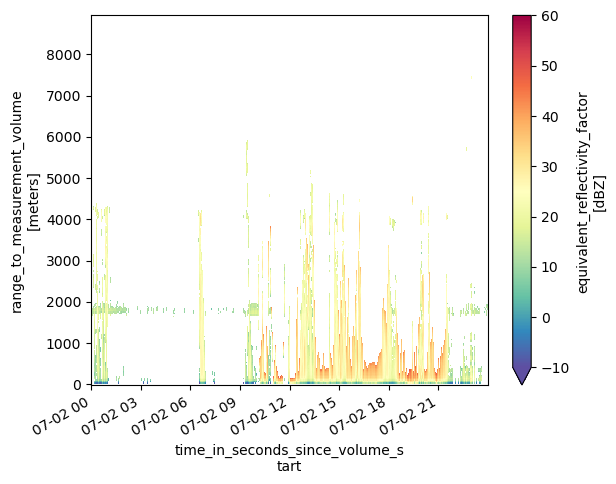

In [6]:
ds["Ze"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60)

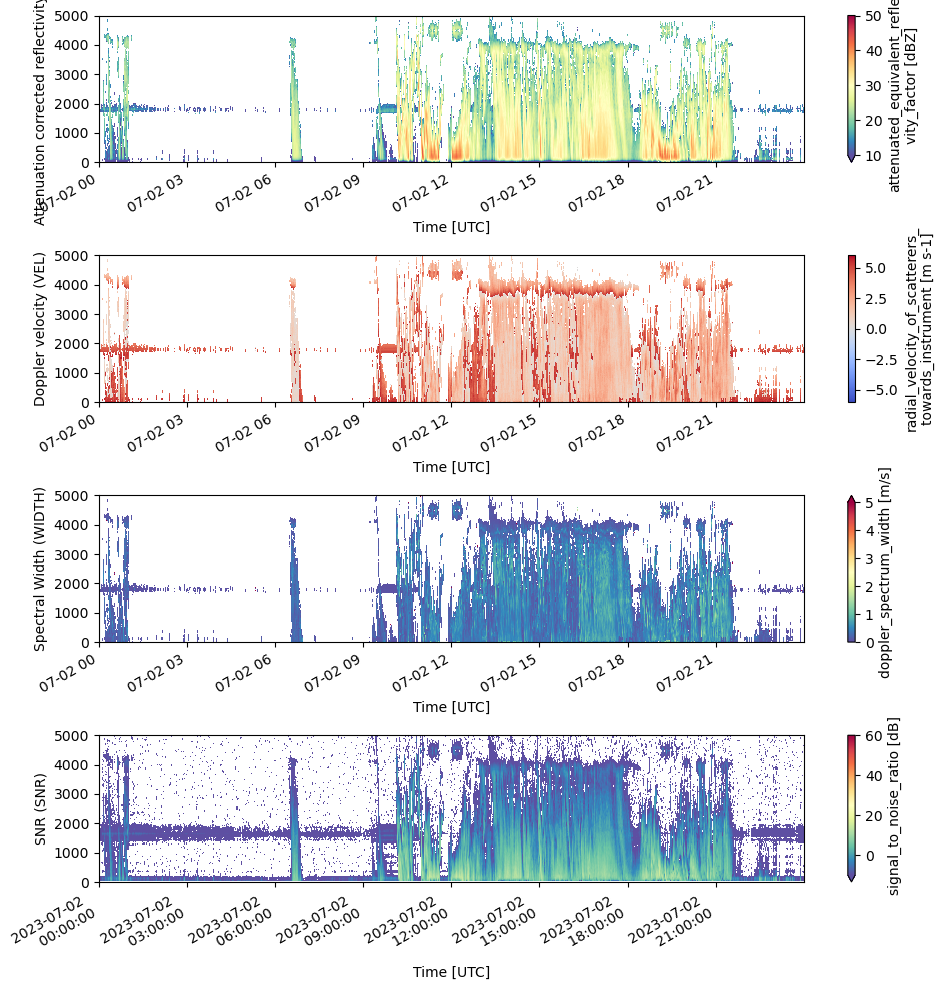

In [9]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]'), ax[0].set_ylabel('Attenuation corrected reflectivity (Zea)')
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]'), ax[1].set_ylabel('Doppler velocity (VEL)')
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]'), ax[2].set_ylabel('Spectral Width (WIDTH)')
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]'), ax[3].set_ylabel('SNR (SNR)')
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()


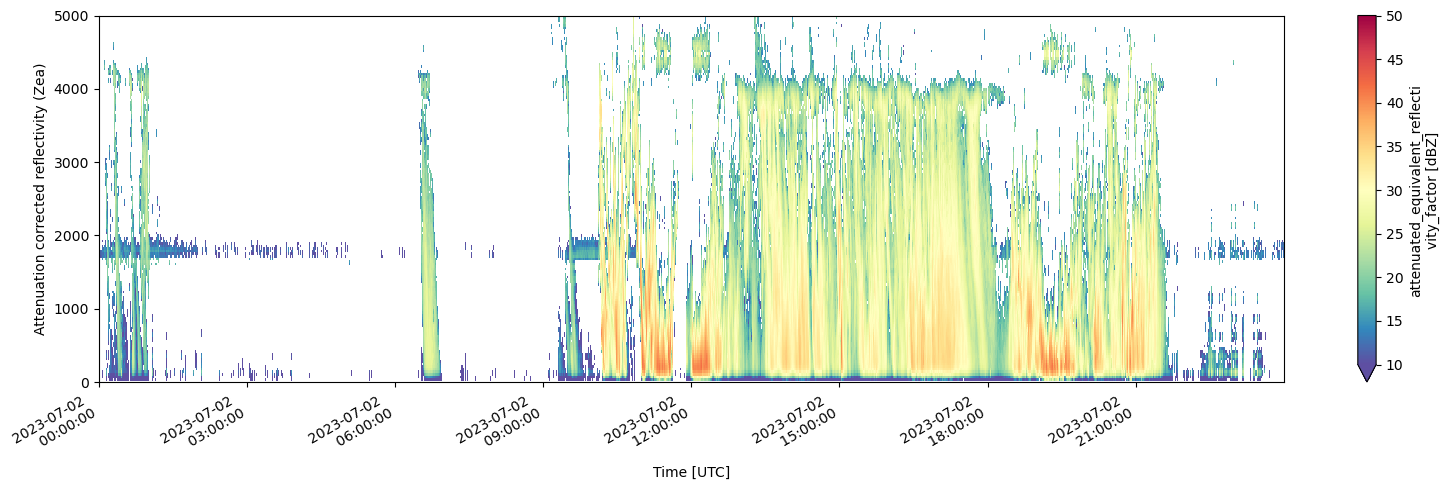

In [7]:
from matplotlib.dates import DateFormatter
fig = plt.figure(figsize=(16,5))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50)
plt.xlabel('Time [UTC]'), plt.ylabel('Attenuation corrected reflectivity (Zea)')
plt.ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.tight_layout()

In [4]:
ds = xr.open_mfdataset('/Users/adamabdelhak/Desktop/Desktop_Adam_MacBook_Air/iCloud_Drive(Archive)/Desktop/MRR-July-2/11_MRR/2023/July-2/20230702_110000.nc')

In [5]:
ds

<xarray.Dataset>
Dimensions:                 (range: 256, sweep: 1, time: 360, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-07-02T11:00:00.0010810...
    elevation               (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                 (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           int32 ...
    time_coverage_start     |S128 ...
    time_coverage_end       |S128 ...
    time_reference          |S128 ...
    instrument_type         |S128 ...
    transfer_function       (range) float64 dask.array<chunksize=(256,), meta=np.ndarray>
    ...                      ...
    ML                      (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    SNR                     (time, range) float32 dask.array<chunksize=(360, 256), meta=np.ndarray>
    index_spectra           (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    N                       (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    D                       (n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(256, 32), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      
    references:       
    source:           
    history:          
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

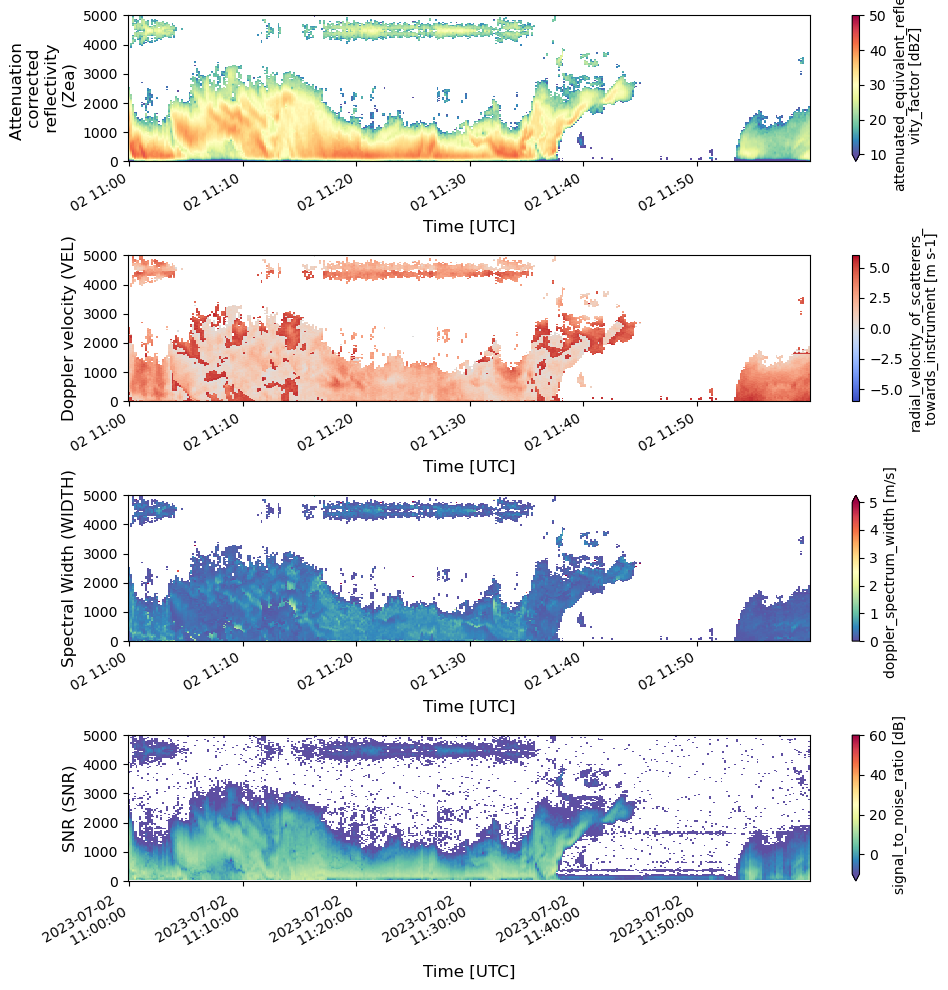

In [10]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()
plt.savefig("MRR_July_2nd_raw.png",dpi=500)

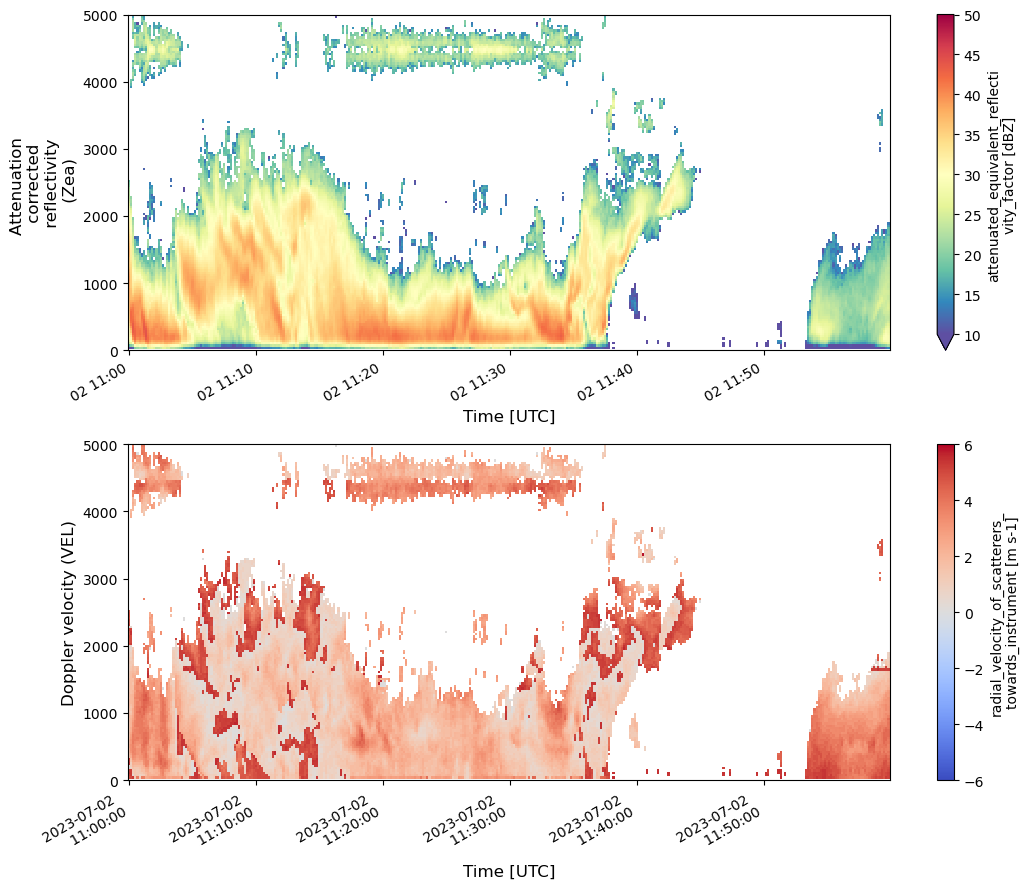

In [9]:
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(2, 1, figsize=(11, 9))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

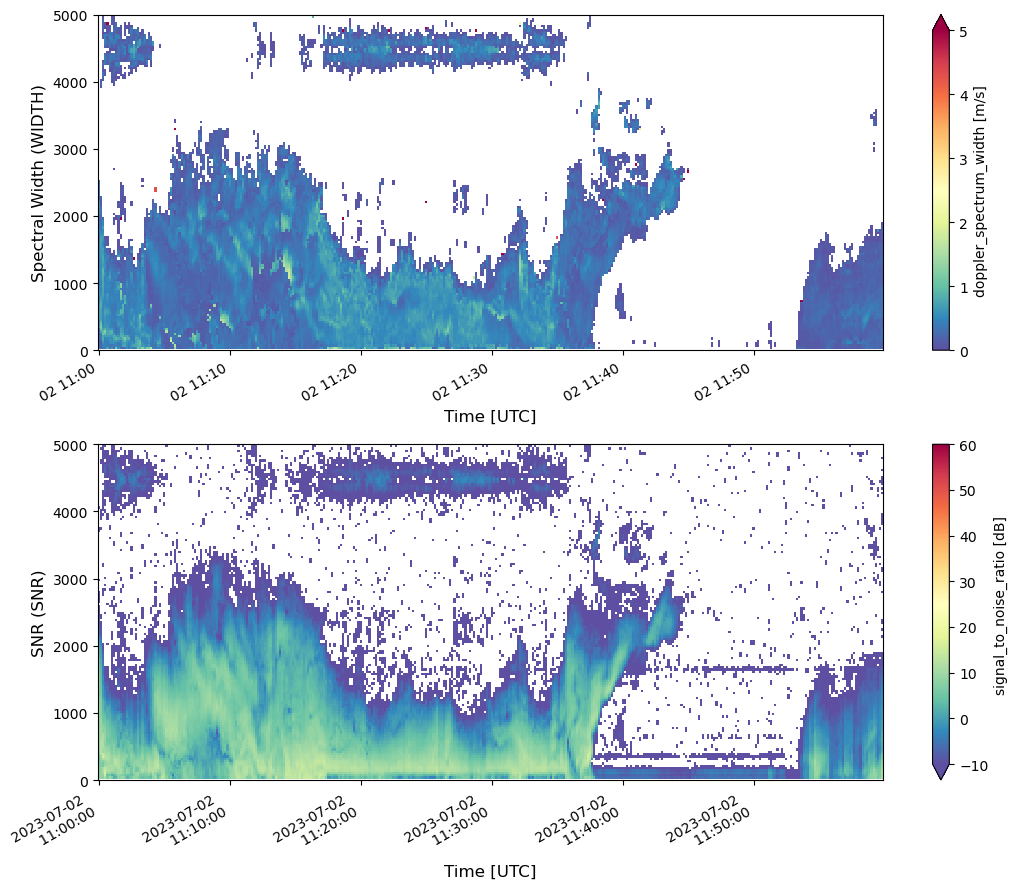

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(11, 9))
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('SNR (SNR)', fontsize=12)
ax[1].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

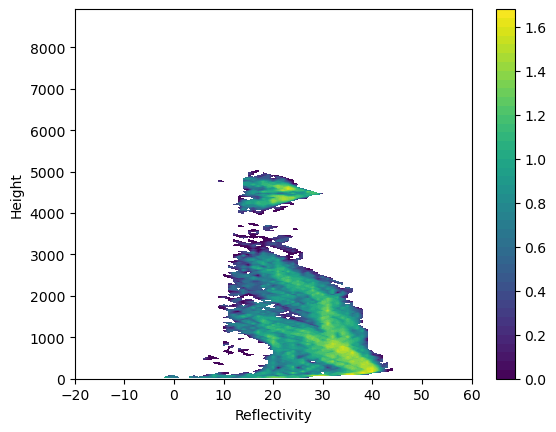

In [12]:
import radtraq
from act.io.armfiles import read_netcdf
import matplotlib.pyplot as plt

# Read in example data


# Calculate CFAD histogram
data_array = radtraq.plotting.cfad.calc_cfad(ds, 'Zea')

# Plot CFAD histogram
dims = data_array.dims
display = radtraq.plotting.cfad.plot_cfad(data_array, data_array[dims[1]], data_array[dims[0]])
plt.xlabel('Reflectivity'), plt.ylabel('Height')
plt.xlim(-20,60)
plt.savefig("RadTraQ_MRR_July_2nd_raw.png",dpi=500)
plt.show()

In [19]:
#for i, d in enumerate(ds.groupby_bins('time', ds.time[::360])):
   #d[1].to_netcdf('MRR-July-2/%d.nc' % i)

In [20]:
#split_ds = list(ds.groupby_bins('time', ds.time[::360]))

In [13]:
ds = xr.open_mfdataset('/Users/adamabdelhak/Desktop/MRR-July-2/Postproc_files_2/2023/May_19/ERUO_20230702_110000_postprocessed.nc')

In [14]:
ds

<xarray.Dataset>
Dimensions:      (time: 360, range: 256)
Coordinates:
  * range        (range) float32 0.0 35.0 70.0 ... 8.855e+03 8.89e+03 8.925e+03
  * time         (time) datetime64[ns] 2023-07-02T11:00:00.001081088 ... 2023...
    elevation    (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth      (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Data variables:
    Zea          (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    VEL          (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    WIDTH        (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    SNR          (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    noise_level  (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    noise_floor  (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data - Re-processed with ASPRO - Po...
    institution:      
    references:       
    source:           
    history:          Re-processed with ASPRO on 13/07/2023 16:13:53 UTC
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Zea,VEL,WIDTH,SNR,noise_level,noise_floor

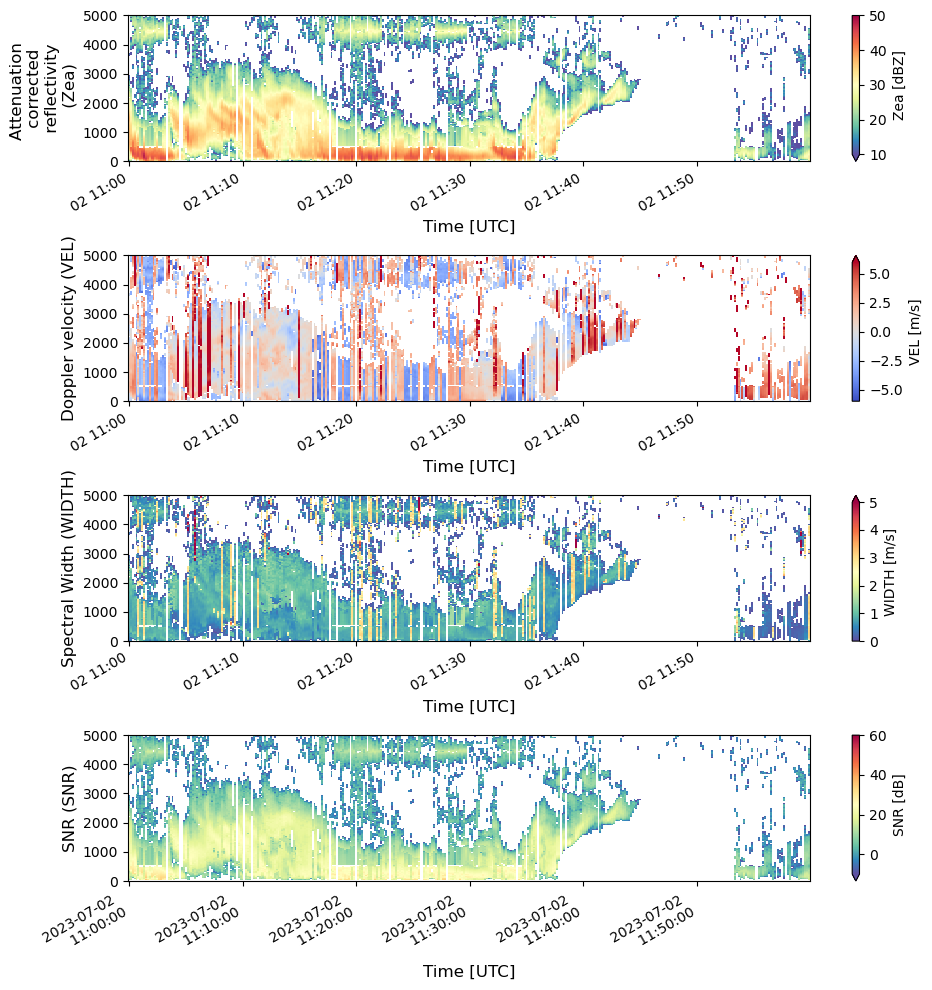

In [16]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["Zea"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Attenuation \n corrected \n reflectivity \n (Zea)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["VEL"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Doppler velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["WIDTH"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectral Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["SNR"].T.plot(cmap='Spectral_r', vmin=-10, vmax=60, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('SNR (SNR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()
plt.savefig("MRR_July_2nd_Postprocess.png",dpi=500)

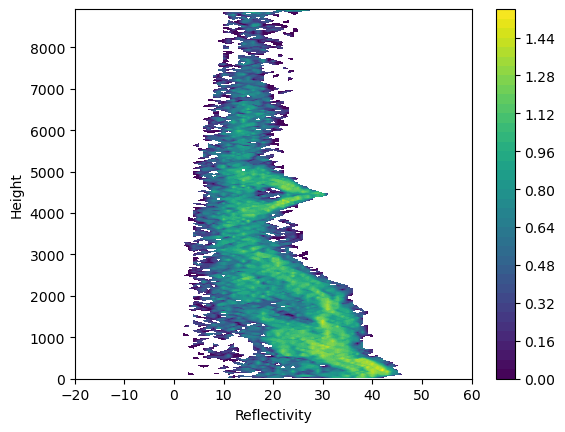

In [18]:
import radtraq
from act.io.armfiles import read_netcdf
import matplotlib.pyplot as plt

# Read in example data


# Calculate CFAD histogram
data_array = radtraq.plotting.cfad.calc_cfad(ds, 'Zea')

# Plot CFAD histogram
dims = data_array.dims
display = radtraq.plotting.cfad.plot_cfad(data_array, data_array[dims[1]], data_array[dims[0]])
plt.xlabel('Reflectivity'), plt.ylabel('Height')
plt.xlim(-20,60)
plt.savefig("RadTraQ_MRR_July_2nd_Postprocess.png",dpi=500)
plt.show()